In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [10]:
data= pd.read_csv('netflix.csv')
arr = np.array(data)

In [11]:
print(np.mean(data.imdb_votes, axis=0))
print()
print(np.mean(data.imdb_score, axis=0))
print()
print(np.max(data.imdb_score, axis=0))
print()
sorted_ind = np.argsort(arr[:,9])
sorted_data = arr[sorted_ind]
print(sorted_data[:10])
print()
print(sorted_data[-10:])

23407.194987659008

6.5334469051675175

9.6

[[1664 'tm549892' 'Aerials' 'MOVIE'
  'Earth is invaded by Aliens from outer space. An intermarried couple living in the city of Dubai are confined to their home due to the uncertainty of the situation. Disconnected from the world outside due to the loss of communication, they explore around their cultural differences in Science in order to understand the reason behind Aliens coming to our planet; only to find themselves caught between a series of extraterrestrial encounters at their very home.'
  2016 nan 90 'tt5314138' 1.5 382.0]
 [4648 'ts319303' "He's Expecting" 'SHOW'
  "When a successful ad executive who's got it all figured out becomes pregnant, he's forced to confront social inequities he'd never considered before."
  2022 'TV-PG' 26 'tt14719276' 1.6 2735.0]
 [1101 'tm171891' 'Himmatwala' 'MOVIE'
  'When a temple priest commits suicide after being dishonored by an evil landlord, his son returns to his native village on a mission of v

In [12]:
data.head(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0


In [13]:
data.tail(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5273,5273,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,tt14216488,4.9,281.0
5274,5274,tm878575,The Heartbreak Club,MOVIE,"Coping with heartbreak, the shy owner of floun...",2021,NaN,101,tt11841144,6.2,188.0
5275,5275,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,tt13887518,4.6,327.0
5276,5276,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,tt13399802,7.2,45.0
5277,5277,tm1004011,Time to Dance,MOVIE,When a ballroom dancerâ€™s shot at a crucial t...,2021,NaN,107,tt8622232,2.2,950.0
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.8,16.0


In [14]:
print(data.isnull().sum())
print()
print(data.info())
df = pd.DataFrame(data)

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes  

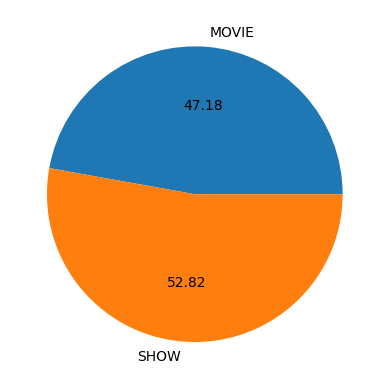

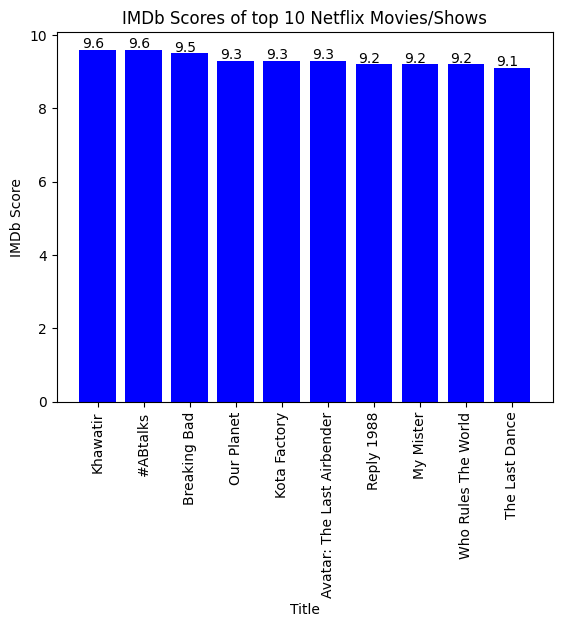

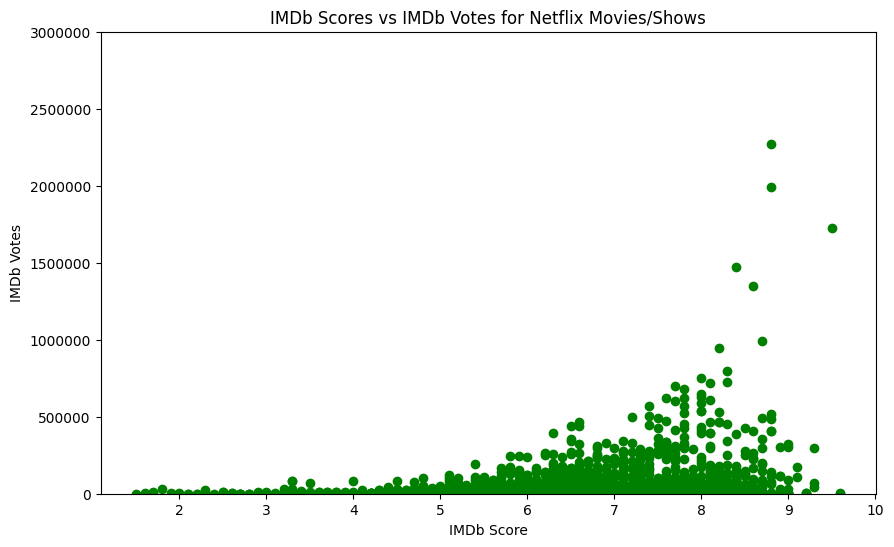

In [17]:
df = pd.DataFrame(data)
grouped = df.groupby('type')['imdb_score'].mean()
plt.pie(grouped.values, labels = grouped.index, autopct='%.2f')
plt.show()
top10_imdb_score = df.sort_values(by = 'imdb_score',ascending= False).head(10)
bars = plt.bar(top10_imdb_score['title'], top10_imdb_score['imdb_score'], color='blue')
plt.xlabel('Title')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores of top 10 Netflix Movies/Shows')
for bar, rating in zip(bars, top10_imdb_score['imdb_score']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{rating:.1f}', ha='center')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df['imdb_score'], df['imdb_votes'], color='green')
plt.xlabel('IMDb Score')
plt.ylabel('IMDb Votes')
plt.title('IMDb Scores vs IMDb Votes for Netflix Movies/Shows')
plt.ylim(0,3000000)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [18]:
cnn = sqlite3.connect('Netflix.db')
%load_ext sql
%sql sqlite:///Netflix.db

ModuleNotFoundError: No module named 'sql'

In [19]:
%%sql
select title, type, release_year,runtime, imdb_score, imdb_votes
from Netflix where imdb_score>8.5 order by imdb_votes desc limit 10
%%sql
select * from Netflix group by type having max(imdb_score)

UsageError: Cell magic `%%sql` not found.


In [ ]:
%%sql
select * from Netflix group by type having max(imdb_score)

In [ ]:
%%sql
select title, type, release_year,runtime, imdb_score, imdb_votes 
from Netflix where release_year>2000 and type ="MOVIE" order by imdb_score desc limit(20)
numeric_columns= ['runtime','imdb_score','imdb_votes']
sns.pairplot(data[numeric_columns])
plt.suptitle('Pair Plot for Netflix Movie/Show Data',y=1.02)
plt.show()

In [1]:
numeric_columns= ['runtime','imdb_score','imdb_votes']
sns.pairplot(data[numeric_columns])
plt.suptitle('Pair Plot for Netflix Movie/Show Data',y=1.02)
plt.show()

NameError: name 'sns' is not defined